<a href="https://colab.research.google.com/github/cinthia005/Lab-PDI/blob/main/ActF4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **PROCESAMIENTO DIGITAL DE IMÁGENES**
**ACTIVIDAD 4**

**Cinthia Janeth Pecina Hernández - 2062979 - IB**

## **Tranformaciones Geométricas**

**1. Preprocesamiento**

(np.float64(-0.5), np.float64(2047.5), np.float64(1147.5), np.float64(-0.5))

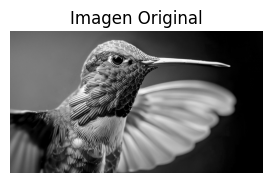

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Cargar imagen en escala de grises
img = cv2.imread('ave_2.jpg', cv2.IMREAD_GRAYSCALE)

# Verificar que la imagen se cargó correctamente
if img is None:
    print("Error: No se pudo cargar ninguna imagen")
    exit()

# Visualizar imagen original
plt.figure(figsize=(15, 10))

plt.subplot(3, 4, 1)
plt.imshow(img, cmap='gray')
plt.title('Imagen Original')
plt.axis('off')

**2. Aplicación de Transformaciones**

(np.float64(-0.5), np.float64(2047.5), np.float64(1147.5), np.float64(-0.5))

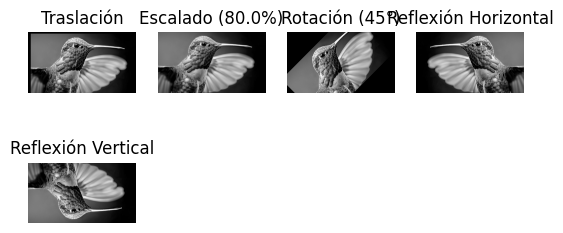

In [10]:
# a) TRASLACIÓN
rows, cols = img.shape
# Matriz de traslación: mover 50 píxeles en x, 30 píxeles en y
M_traslacion = np.float32([[1, 0, 50], [0, 1, 30]])
img_trasladada = cv2.warpAffine(img, M_traslacion, (cols, rows))

plt.subplot(3, 4, 1)
plt.imshow(img_trasladada, cmap='gray')
plt.title('Traslación')
plt.axis('off')

# b) ESCALADO
# Reducir al 80% del tamaño original
scale_factor = 0.8
img_escalada = cv2.resize(img, None, fx=scale_factor, fy=scale_factor,
                         interpolation=cv2.INTER_LINEAR)

plt.subplot(3, 4, 2)
plt.imshow(img_escalada, cmap='gray')
plt.title(f'Escalado ({scale_factor*100}%)')
plt.axis('off')

# c) ROTACIÓN
# Rotar 45 grados alrededor del centro
center = (cols // 2, rows // 2)
angle = 45
scale = 1.0
M_rotacion = cv2.getRotationMatrix2D(center, angle, scale)
img_rotada = cv2.warpAffine(img, M_rotacion, (cols, rows))

plt.subplot(3, 4, 3)
plt.imshow(img_rotada, cmap='gray')
plt.title(f'Rotación ({angle}°)')
plt.axis('off')

# d) REFLEXIÓN
# Reflexión horizontal (eje y)
img_reflexion_h = cv2.flip(img, 1)
# Reflexión vertical (eje x)
img_reflexion_v = cv2.flip(img, 0)

plt.subplot(3, 4, 4)
plt.imshow(img_reflexion_h, cmap='gray')
plt.title('Reflexión Horizontal')
plt.axis('off')

plt.subplot(3, 4, 5)
plt.imshow(img_reflexion_v, cmap='gray')
plt.title('Reflexión Vertical')
plt.axis('off')

**3. Tranformada de Fourier**

(np.float64(-0.5), np.float64(2047.5), np.float64(1147.5), np.float64(-0.5))

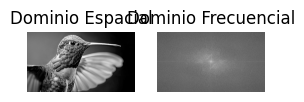

In [11]:
# Aplicar DFT usando numpy
dft = np.fft.fft2(img)
dft_shift = np.fft.fftshift(dft)  # Centrar las frecuencias bajas

# Calcular magnitud del espectro (usando log para mejor visualización)
magnitude_spectrum = np.log(np.abs(dft_shift) + 1)  # +1 para evitar log(0)

# Visualizar dominio espacial y frecuencial
plt.subplot(3, 4, 7)
plt.imshow(img, cmap='gray')
plt.title('Dominio Espacial')
plt.axis('off')

plt.subplot(3, 4, 8)
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Dominio Frecuencial')
plt.axis('off')


**4. Filtrado en Dominio Frecuencial**

(np.float64(-0.5), np.float64(2047.5), np.float64(1147.5), np.float64(-0.5))

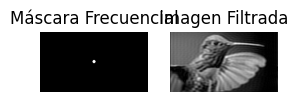

In [12]:
# Crear máscara para eliminar frecuencias altas (filtro pasa-bajas)
rows, cols = img.shape
crow, ccol = rows // 2, cols // 2

# Crear máscara circular
mask = np.zeros((rows, cols), np.uint8)
r = 30  # Radio del filtro
center = [crow, ccol]
x, y = np.ogrid[:rows, :cols]
mask_area = (x - center[0]) ** 2 + (y - center[1]) ** 2 <= r*r
mask[mask_area] = 1

# Aplicar máscara
fshift = dft_shift * mask
f_ishift = np.fft.ifftshift(fshift)
img_filtrada = np.fft.ifft2(f_ishift)
img_filtrada = np.abs(img_filtrada)

# Visualizar filtrado
plt.subplot(3, 4, 9)
plt.imshow(mask, cmap='gray')
plt.title('Máscara Frecuencial')
plt.axis('off')

plt.subplot(3, 4, 10)
plt.imshow(img_filtrada, cmap='gray')
plt.title('Imagen Filtrada')
plt.axis('off')


**5. Comparación de la imagen detallada con la borrosa**

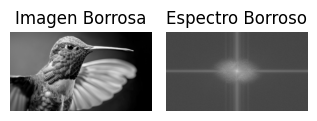

In [13]:
# Crear versión borrosa de la imagen
img_blur = cv2.GaussianBlur(img, (15, 15), 0)

# DFT de imagen borrosa
dft_blur = np.fft.fft2(img_blur)
dft_shift_blur = np.fft.fftshift(dft_blur)
magnitude_spectrum_blur = np.log(np.abs(dft_shift_blur) + 1)

plt.subplot(3, 4, 11)
plt.imshow(img_blur, cmap='gray')
plt.title('Imagen Borrosa')
plt.axis('off')

plt.subplot(3, 4, 12)
plt.imshow(magnitude_spectrum_blur, cmap='gray')
plt.title('Espectro Borroso')
plt.axis('off')

plt.tight_layout()
plt.show()


**Análisis Comparativo**

In [14]:
# Imprimir resultados y comparar
print("=" * 60)
print("ANÁLISIS DE RESULTADOS")
print("=" * 60)

print("\n1. TRANSFORMACIONES GEOMÉTRICAS:")
print("   - Traslación: Desplaza la imagen sin deformarla")
print("   - Escalado: Cambia el tamaño manteniendo proporciones")
print("   - Rotación: Gira la imagen alrededor de un punto")
print("   - Reflexión: Crea imagen espejo en eje horizontal/vertical")

print("\n2. DOMINIO FRECUENCIAL:")
print("   - Centro: Frecuencias bajas (información general de la imagen)")
print("   - Bordes: Frecuencias altas (detalles, bordes, ruido)")

print("\n3. FILTRADO FRECUENCIAL:")
print("   - Filtro pasa-bajas: Suaviza imagen eliminando detalles")
print("   - Filtro pasa-altas: Resalta bordes y detalles")

ANÁLISIS DE RESULTADOS

1. TRANSFORMACIONES GEOMÉTRICAS:
   - Traslación: Desplaza la imagen sin deformarla
   - Escalado: Cambia el tamaño manteniendo proporciones
   - Rotación: Gira la imagen alrededor de un punto
   - Reflexión: Crea imagen espejo en eje horizontal/vertical

2. DOMINIO FRECUENCIAL:
   - Centro: Frecuencias bajas (información general de la imagen)
   - Bordes: Frecuencias altas (detalles, bordes, ruido)

3. FILTRADO FRECUENCIAL:
   - Filtro pasa-bajas: Suaviza imagen eliminando detalles
   - Filtro pasa-altas: Resalta bordes y detalles
